In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

from molecular_dynamics import run
from brownian_motion import BrownianMotion

In [34]:
# set up initial coordinates and parameters
epsilon = 0.25
sigma = 1
T = 1
kb = 1
dt = 0.005
m = 1
box_length = 3.5
iterations = 10000

initial_coordinates = np.loadtxt("../../data/init_crds_boxl_3.5-2.dat")
initial_coordinates

array([[-1.2019639 ,  0.04937449,  1.3446687 ],
       [ 0.95762696,  0.11536136, -1.3533073 ],
       [-0.18897434,  0.52372794, -1.3651418 ],
       [-1.6199141 , -0.04095865,  0.19033262],
       [ 1.5412039 , -0.75625664, -1.0000951 ],
       [-1.1155417 , -1.6664609 , -0.99065462],
       [-0.70326225, -0.13556516, -0.21229811],
       [ 1.0541455 ,  1.3754934 , -1.3764948 ],
       [-0.02434042,  0.09024578,  0.67682947],
       [ 0.57101383, -0.7828554 , -1.0092848 ],
       [-0.75751888,  1.3451685 ,  0.35401673],
       [ 0.02166862,  1.4060785 , -0.56307622],
       [ 1.0072253 , -0.18563138,  0.94703502],
       [-0.17290178, -1.4916186 ,  1.6233682 ],
       [ 0.86533713, -1.2297605 ,  0.93751467],
       [ 1.7441529 , -0.90349879,  1.4845521 ],
       [ 0.22370473, -0.4626245 ,  1.6397821 ],
       [-1.3001678 ,  0.77344676, -1.1569506 ],
       [ 1.6386284 ,  1.270492  , -0.4038093 ],
       [ 0.4666099 ,  0.85132912,  1.231999  ],
       [-0.53585311, -1.3494132 , -0.152

In [5]:
potentials, kinetics, energies, temperatures, force, velocity, position = run(
    positions=initial_coordinates,
    T=T,
    m=m,
    dt=dt,
    epsilon=epsilon,
    sigma=sigma,
    box_length=box_length,
    iterations=iterations
)

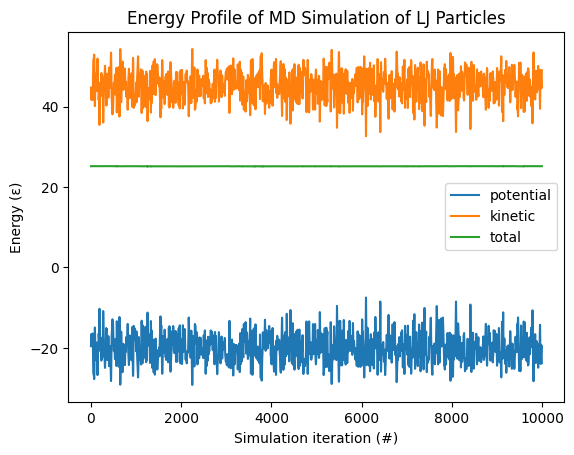

In [7]:
# plotting the energies after one run
plt.figure()
iters = np.arange(0, iterations, 1)
plt.plot(iters, potentials, label="potential")
plt.plot(iters, kinetics, label="kinetic")
plt.plot(iters, energies, label="total")
plt.legend()
plt.xlabel("Simulation iteration (#)")
plt.ylabel("Energy (ε)")
plt.title("Energy Profile of MD Simulation of LJ Particles")
plt.savefig("../../data/MD_Trajectories_Energy")
plt.show()

In [29]:
_, _, energies, _, _, _, _ = run(
    positions=initial_coordinates,
    T=T,
    m=m,
    dt=0.1,
    epsilon=epsilon,
    sigma=sigma,
    box_length=box_length,
    iterations=10
)

In [30]:
energies[0]

21.235626196026075

In [31]:
energies[-1]

6.647060517893657e+22

From above, if the time step is too large, then the total energy is not conserved, ie the final and starting energies are radically different. This occurs at some critical value of dt.

In [35]:
T_values = [1, 0.5, 0.1]
for temp in T_values:
    _, _, _, _, _, _, positions_eq = run(  # run to equilibrate the system first
        positions=initial_coordinates,
        T=temp,
        m=m,
        dt=dt,
        epsilon=epsilon,
        sigma=sigma,
        box_length=box_length,
        iterations=iterations
    )
    potentials, _, _, temperatures, _, _, _ = run(
        positions=positions_eq,
        T=temp,
        m=m,
        dt=dt,
        epsilon=epsilon,
        sigma=sigma,
        box_length=box_length,
        iterations=iterations
    )
    print("At T=", temp)
    print("Average potential energy", np.average(potentials), "(ε)")
    print("Average temperature", np.average(temperatures))

At T= 1
Average potential energy -19.45940874379655 (ε)
Average temperature 1.1015614990172657
At T= 0.5
Average potential energy -26.581552925325116 (ε)
Average temperature 0.6139545352054393
At T= 0.1
Average potential energy -34.11673248484453 (ε)
Average temperature 0.14083423822664334


In [45]:
D = 2
dt = 1e-4
kT = 10
pos = [-1, 0]
iterations = 100000

brownian = BrownianMotion(D, dt, kT, pos, iterations)
trajectory = brownian.run()

In [46]:
trajectory = np.array(trajectory)
trajectory_x = trajectory[:, 0]
trajectory_y = trajectory[:, 1]

In [56]:
def V(x, y):
    return 5 * (x ** 2 - 1) ** 2 + 10 * (y ** 2) * (1 / (np.tan(70 / 180 * np.pi)) ** 2)

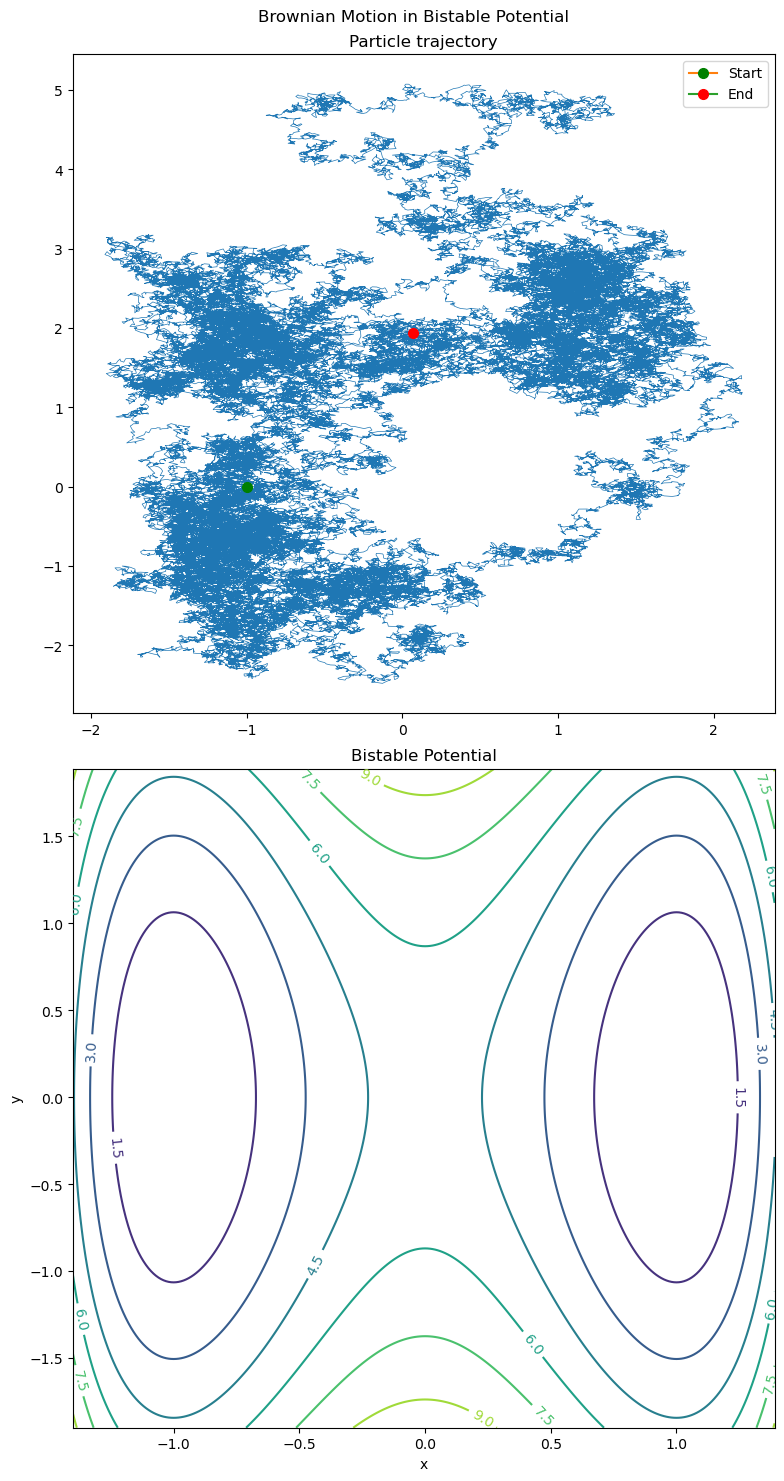

In [88]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(8,15))
fig.tight_layout(pad=2)
fig.suptitle('Brownian Motion in Bistable Potential')
fig.subplots_adjust(top=0.95)
plt.xlabel("x")
plt.ylabel("y")

ax1.title.set_text("Particle trajectory")
ax1.plot(trajectory_x, trajectory_y, lw=0.5)
ax1.plot(pos[0], pos[1], label="Start", marker="o", markersize=7, markerfacecolor='green', markeredgecolor='green')
ax1.plot(trajectory_x[-1], trajectory_y[-1], label="End", marker="o", markersize=7, markerfacecolor='red', markeredgecolor='red')
ax1.legend()

ax2.title.set_text("Bistable Potential")
ax2.set_ylabel("y")
xs = np.arange(-1.4, 1.4, 0.01)
ys = np.arange(-1.9, 1.9, 0.01)
X, Y = np.meshgrid(xs, ys)
Z = V(X, Y)
CS = ax2.contour(X, Y, Z)
ax2.clabel(CS, inline=True, fontsize=10)

fig.savefig("../../data/Brownian_Motion.png")

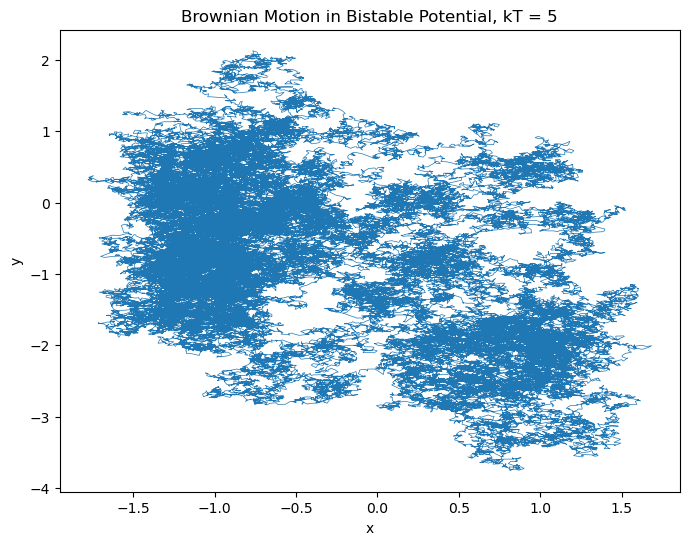

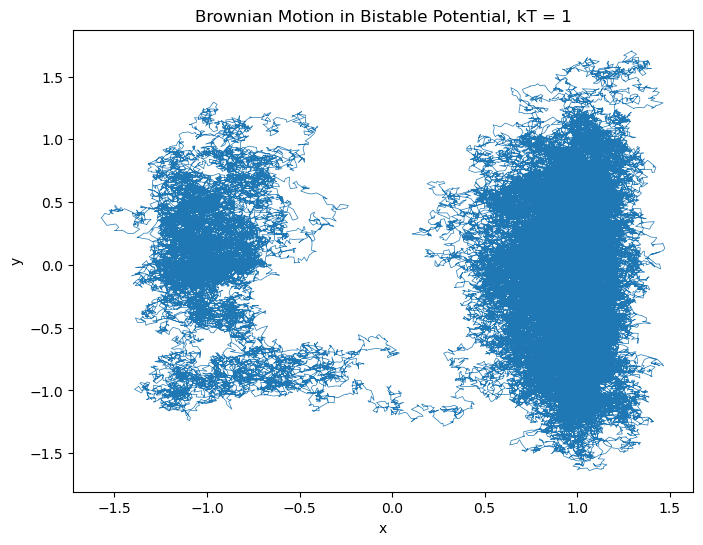

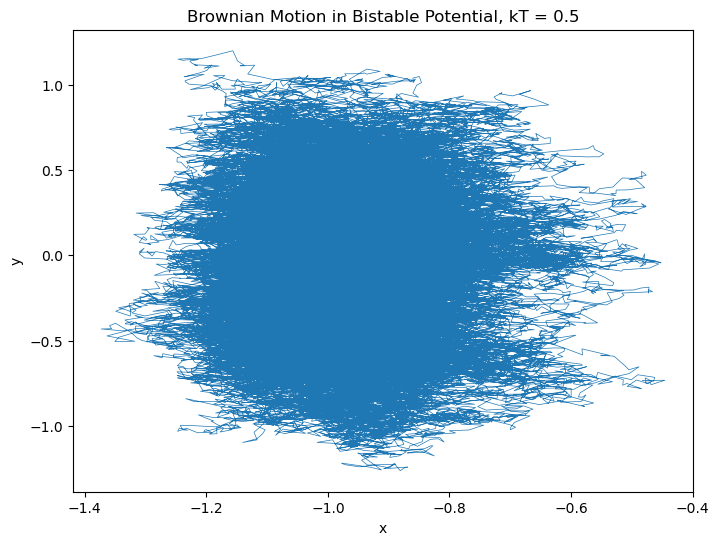

In [93]:
kbT_values = [5, 1, 0.5]
for temp in kbT_values:
    brownian = BrownianMotion(D, dt, temp, pos, iterations)
    trajectory = brownian.run()
    trajectory = np.array(trajectory)
    trajectory_x = trajectory[:, 0]
    trajectory_y = trajectory[:, 1]

    plt.figure(figsize=(8, 6))
    plt.title("Brownian Motion in Bistable Potential, kT = " + str(temp))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(trajectory_x, trajectory_y, lw=0.5)
    plt.savefig("../../data/Brownian_kt" + str(temp) + ".png")
    plt.show()

The lower the temperature, the particles have less kinetic energy to overcome the potential barrier, so they cluster more around the center as kT decreases, which we can see in the plotted trajectories

In [ ]:
num_simulations = 1000
brownian = BrownianMotion(D, dt, 1, pos, iterations)
count = 0
basin = np.array((1, 0))

for i in range(num_simulations):
    trajectory = brownian.run()
    trajectory = np.array(trajectory)

    for pos in trajectory:
        distance_from_minima = np.linalg.norm(basin - pos)
        if distance_from_minima <= 0.15:
            count += 1
            break
count